# Blatt 3

## Aufgabe 1 Beugungsmuster einer Lochblende

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special as spec

### Schreibe ein Programm zur Berechnung von J0(x), J1(x) und J2(x) fur ¨ x = 0..20 und N = 100 mit der Trapezmethode.


In [2]:
# variable names are different than in the exercise sheet
# n = m
# x = r
# t = theta

# inner function
def f(n,x,t):
    return np.cos(n*t-x*np.sin(t))

# numerical integration
def J(n,x):
    h = m.pi/100
    sum = 0
    for i in range(0,100):
        sum += h/2*(f(n,x,i*h)+f(n,x,(i+1)*h))
    return sum/m.pi # normalization

In [3]:
# testing values
J(0,0), J(0,1), J(0,2), J(1,1)

(0.9999999999999986,
 0.7651976865579665,
 0.22389077914123567,
 0.44005058574493366)

### Plotte die Ergebnisse zum Vergleich mit den bekannten Besselfunktionen (scipy.special.j0(), etc.).

In [4]:
spec.j0(0), spec.j0(1), spec.j0(2), spec.j1(1)

(1.0, 0.7651976865579665, 0.22389077914123562, 0.44005058574493355)

Text(0, 0.5, 'Intensity')

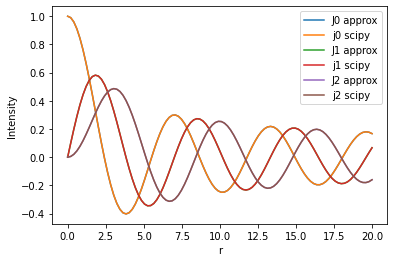

In [5]:
x = np.linspace(0,20,100)
plt.plot(x,J(0,x),label='J0 approx')
plt.plot(x,spec.j0(x),label='j0 scipy')

plt.plot(x,J(1,x),label='J1 approx')
plt.plot(x,spec.j1(x),label='j1 scipy')

plt.plot(x,J(2,x),label='J2 approx')
plt.plot(x,spec.jv(2,x),label='j2 scipy')

plt.legend()
plt.xlabel('r')
plt.ylabel('Intensity')

# the difference between the approximated and the scipy function is very small
# we can't see the difference in the plot

Text(0, 0.5, 'J(m,r) - scipy.special.jm(r)')

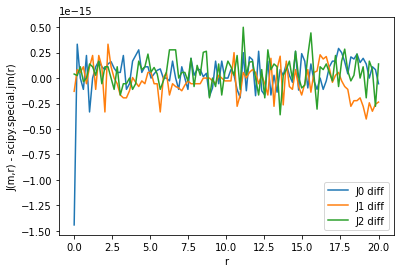

In [6]:
plt.plot(x,J(0,x)-spec.j0(x),label='J0 diff')
plt.plot(x,J(1,x)-spec.j1(x),label='J1 diff')
plt.plot(x,J(2,x)-spec.jv(2,x),label='J2 diff')

plt.legend()
plt.xlabel('r')
plt.ylabel('J(m,r) - scipy.special.jm(r)')

### Plotte das Beugungsmuster einer Lochblende als Dichteplot fur verschiedene Wellenlängen
I(r) = (J1(kr)/(kr))^2 mit k = 2π/λ u
Hinweis:
https://scipy-lectures.github.io/intro/matplotlib/auto_examples/plot_contour_ex.html

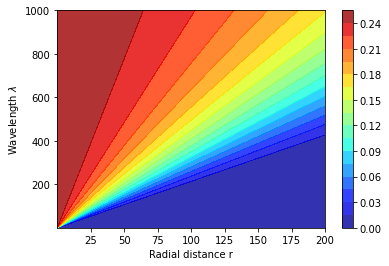

In [7]:
r = np.linspace(.001,200, 256)
l = np.linspace(.001, 1000, 256)
R, L = np.meshgrid(r, l)

plt.contourf(R, L, (J(1,R*(2*m.pi/L))/(R*(2*m.pi/L)))**2, 20, alpha=.8, cmap='jet')

plt.xlabel('Radial distance r')
plt.ylabel('Wavelength $\lambda$')
plt.colorbar()
# the plot shows the intensity of the light